In [8]:
%matplotlib inline

In [1]:
from csv import DictReader
from decimal import Decimal
import calculate
import pylab

In [6]:
def load_imf_unemployment():
    rdr = DictReader(open('../../data/imf_indicators.tsv', 'rb'), delimiter='\t')
    return [r for r in rdr if r.get('Subject Descriptor') and
            'Unemployment' in r.get('Subject Descriptor')]

In [3]:
def get_avg_unemployment(data, start_year=2013, end_year=2015):
    avgs = {}
    while start_year <= end_year:
        avg = calculate.mean([
            Decimal(rate.get(str(start_year))) for
            rate in data if rate.get(str(start_year))])
        avgs[str(start_year)] = avg
        start_year += 1
    return avgs

In [4]:
def chart_unemployment():
    imf_data = load_imf_unemployment()
    averages = get_avg_unemployment(imf_data)
    pylab.plot(averages.keys(), averages.values())
    pylab.ylabel('Average Unemployment')
    pylab.xlabel('Years')
    pylab.title('Average Unemployment Over Time')
    pylab.ylim([0, sorted(averages.values(), reverse=True)[0] + 1])
    pylab.show()

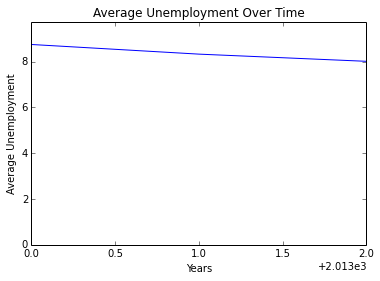

In [9]:
chart_unemployment()